# Libraries

In [1]:
import pandas as pd
import numpy as np

# Data preparation

In [2]:
data = pd.read_csv("diabetes_data.csv")

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [10]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

## Removing unimportant features

Previously in the application of optimal ML model several features were unimportant
with no contribution to the prediction, so they can be removed and model will be refined

In [11]:
unimportant_features = ['muscle_stiffness', 'partial_paresis',
'visual_blurring', 'polyphagia', 'sudden_weight_loss']

In [15]:
data.drop(columns=unimportant_features, axis=1, inplace= True)

In [16]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'weakness', 'genital_thrush',
       'itching', 'irritability', 'delayed_healing', 'alopecia', 'obesity',
       'class'],
      dtype='object')

In [17]:
data.head()

,age,gender,polyuria,polydipsia,weakness,genital_thrush,itching,irritability,delayed_healing,alopecia,obesity,class
0,40,Male,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,Yes,No,No,No,No,Yes,No,Positive
2,41,Male,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,No,Positive
4,60,Male,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Positive


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              520 non-null    int64 
 1   gender           520 non-null    object
 2   polyuria         520 non-null    object
 3   polydipsia       520 non-null    object
 4   weakness         520 non-null    object
 5   genital_thrush   520 non-null    object
 6   itching          520 non-null    object
 7   irritability     520 non-null    object
 8   delayed_healing  520 non-null    object
 9   alopecia         520 non-null    object
 10  obesity          520 non-null    object
 11  class            520 non-null    object
dtypes: int64(1), object(11)
memory usage: 48.9+ KB


## Data encoding

In [19]:
# Encoding features
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [20]:
col_encode = data.select_dtypes(include='O').columns
col_encode

Index(['gender', 'polyuria', 'polydipsia', 'weakness', 'genital_thrush',
       'itching', 'irritability', 'delayed_healing', 'alopecia', 'obesity',
       'class'],
      dtype='object')

In [21]:
# removing gender and class from label encoding
col_to_label_encode = ['polyuria', 'polydipsia', 'weakness', 'genital_thrush',
       'itching', 'irritability', 'delayed_healing', 'alopecia', 'obesity']

In [22]:
for col in col_to_label_encode:
    data[col] = LE.fit_transform(data[col].astype(str))

In [23]:
data.head()

,age,gender,polyuria,polydipsia,weakness,genital_thrush,itching,irritability,delayed_healing,alopecia,obesity,class
0,40,Male,0,1,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,1,0,0,0,0,1,0,Positive
2,41,Male,1,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,0,1,0,0,Positive
4,60,Male,1,1,1,0,1,1,1,1,1,Positive


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              520 non-null    int64 
 1   gender           520 non-null    object
 2   polyuria         520 non-null    int32 
 3   polydipsia       520 non-null    int32 
 4   weakness         520 non-null    int32 
 5   genital_thrush   520 non-null    int32 
 6   itching          520 non-null    int32 
 7   irritability     520 non-null    int32 
 8   delayed_healing  520 non-null    int32 
 9   alopecia         520 non-null    int32 
 10  obesity          520 non-null    int32 
 11  class            520 non-null    object
dtypes: int32(9), int64(1), object(2)
memory usage: 30.6+ KB


In [25]:
print(LE.classes_)

['No' 'Yes']


In [26]:
gender_map = {'Female':0, 'Male':1}
class_map = {'Negative':0, 'Positive':1}

In [27]:
data['gender'] = data['gender'].map(gender_map)
data['class'] = data['class'].map(class_map)

In [28]:
data.head()

,age,gender,polyuria,polydipsia,weakness,genital_thrush,itching,irritability,delayed_healing,alopecia,obesity,class
0,40,1,0,1,1,0,1,0,1,1,1,1
1,58,1,0,0,1,0,0,0,0,1,0,1
2,41,1,1,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,0,1,0,0,1
4,60,1,1,1,1,0,1,1,1,1,1,1


In [29]:
data.describe()

,age,gender,polyuria,polydipsia,weakness,genital_thrush,itching,irritability,delayed_healing,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.586538,0.223077,0.486538,0.242308,0.459615,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.492928,0.416710,0.500300,0.428892,0.498846,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ML model

### Train test split

In [30]:
# Select target variable
target_col='class'

In [31]:
X = data.drop(target_col, axis = 1)
y = data[target_col]

In [32]:
X

,age,gender,polyuria,polydipsia,weakness,genital_thrush,itching,irritability,delayed_healing,alopecia,obesity
0,40,1,0,1,1,0,1,0,1,1,1
1,58,1,0,0,1,0,0,0,0,1,0
2,41,1,1,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,0,1,0,0
4,60,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,0,0,1,0,1,0,0
516,48,0,1,1,1,0,1,1,1,0,0
517,58,0,1,1,1,0,0,0,0,0,1
518,32,0,0,0,1,0,1,0,1,1,0


In [33]:
feature_names = X.columns
feature_names

Index(['age', 'gender', 'polyuria', 'polydipsia', 'weakness', 'genital_thrush',
       'itching', 'irritability', 'delayed_healing', 'alopecia', 'obesity'],
      dtype='object')

In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [35]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
# Splitting dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Hyperparameter tuning for Random Forest ML model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'criterion': ['gini', 'entropy'],
             'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)
best_score = grid.best_score_
best_params = grid.best_params_
print("Best score:", round(best_score,3))
print("(Hyper)parameters setting for best score:", best_params)

Best score: 0.977
(Hyper)parameters setting for best score: {'criterion': 'gini', 'n_estimators': 200}


In [39]:
best_model = grid.best_estimator_
best_model

RandomForestClassifier(n_estimators=200)

### Test prediction

In [40]:
best_model.score(X_test, y_test)

0.9769230769230769

In [41]:
y_pred = best_model.predict(X_test)

## Evaluation of model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [43]:
target_names = ['Negative(0)', 'Positive(1)']

In [44]:
# Classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      0.96      0.97        55
 Positive(1)       0.97      0.99      0.98        75

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



In [45]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[53,  2],
       [ 1, 74]], dtype=int64)

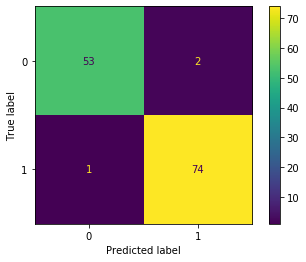

In [46]:
plot_confusion_matrix(best_model, X_test, y_test)

## Saving the model

In [47]:
import joblib
print("Joblib", joblib.__version__)

Joblib 0.14.1


In [48]:
# save Random Forest model
model_file_rf = open("random_forest_model_diabetes_refined_31_5_2021.pkl", "wb")
joblib.dump(best_model, model_file_rf)
model_file_rf.close()

## Feature importance

In [49]:
# feature importance
import matplotlib.pyplot as plt 
import time
from sklearn.inspection import permutation_importance
start_time = time.time()
result = permutation_importance(
best_model, X_test, y_test, n_repeats=10, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 12.371 seconds


In [51]:
forest_importances.sort_values(ascending= False)

polyuria           0.188462
polydipsia         0.158462
gender             0.093077
alopecia           0.053077
age                0.022308
itching            0.020000
obesity            0.014615
irritability       0.013846
genital_thrush     0.010000
delayed_healing    0.008462
weakness           0.002308
dtype: float64

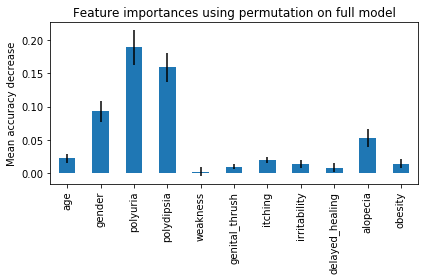

In [52]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()